ドライブのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ディレクトリの作成

In [ ]:
mkdir data

ディレクトリへ移動移動

In [ ]:
cd data

/content/data


「digits.csv」アップロード

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digits.csv to digits.csv


データ分析対象データ
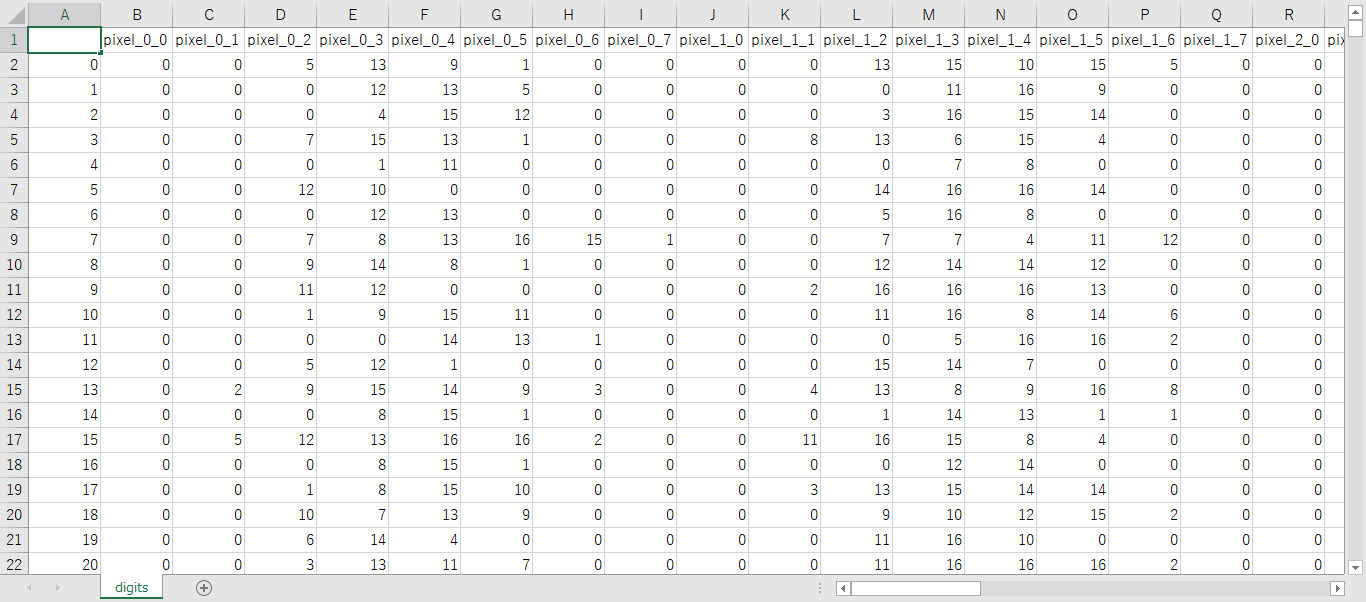

■正解データ：target（0～9の数値）

■特徴量候補：pixel_0_0～pixel_7_7

※1画素目から64画素目までの値（0：白、1：黒）

各種ライブラリのインポート

In [ ]:
#DataFrameを用いるためpandasをインポート
import pandas as pd
#訓練データとテストデータ分割のためtrain_test_splitインポート
from sklearn.model_selection import train_test_split
#標準化機能を用いるためStandardScalerをインポート
from sklearn.preprocessing import StandardScaler
#効率的なループ実装のためitertoolsをインポート
import itertools
#決定木モデルを用いるためtreeをインポート
from sklearn import tree
import matplotlib.pyplot as plt
#ロジスティック回帰を用いるためLogisticRegressionをインポート
from sklearn.linear_model import LogisticRegression
#ランダムフォレストを用いるためRandomForestClassifierをインポート
from sklearn.ensemble import RandomForestClassifier
#アダブーストを用いるためAdaBoostClassifierをインポート
from sklearn.ensemble import AdaBoostClassifier
# 決定木を用いるためDecisionTreeClassifierをインポート
from sklearn.tree import DecisionTreeClassifier


CSVファイル「digits.csv」読み込み

In [ ]:
df = pd.read_csv('digits.csv',skipinitialspace=True) #カンマ後の空白をスキップする

読み込んだcsvファイルを確認するため、先頭・末尾それぞれ5行表示

In [ ]:
df.head()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,0,5,13,9,1,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,1,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,2,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,3,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
4,4,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [ ]:
df.tail()

,Unnamed: 0,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,1792,0,0,4,10,13,6,0,0,0,...,0,0,0,2,14,15,9,0,0,9
1793,1793,0,0,6,16,13,11,1,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,1794,0,0,1,11,15,1,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,1795,0,0,2,10,7,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9
1796,1796,0,0,10,14,8,1,0,0,0,...,0,0,1,8,12,14,12,1,0,8


「Unnamed: 0」列の削除

In [ ]:
df = df.drop(['Unnamed: 0',],axis = 1)
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
5,0,0,12,10,0,0,0,0,0,0,...,0,0,0,9,16,16,10,0,0,5
6,0,0,0,12,13,0,0,0,0,0,...,0,0,0,1,9,15,11,3,0,6
7,0,0,7,8,13,16,15,1,0,0,...,0,0,0,13,5,0,0,0,0,7
8,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
9,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9


読み込んだデータフレームを訓練データとテストデータに分割する

１．訓練データ（train_val）とテストデータ(test)の比率は8:2、乱数シードは0

２．訓練データは必要な前処理を実施後、更に訓練データと検証データに分割する

In [ ]:
train_val, test = train_test_split(df,test_size = 0.2,random_state = 0)

欠損値の確認（欠損値がないことが確認できる）

In [ ]:
train_val.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

正解データを抽出

In [ ]:
t = train_val[['target']]
t.head()

,target
1109,6
940,5
192,3
260,4
1148,4


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


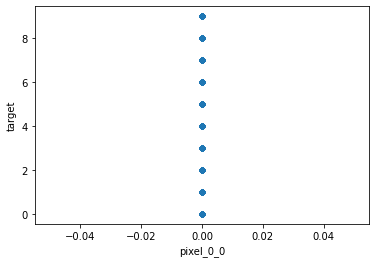

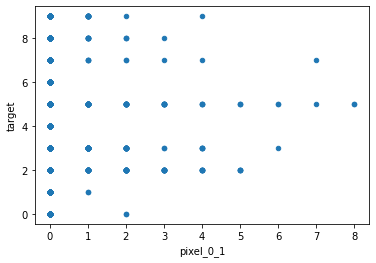

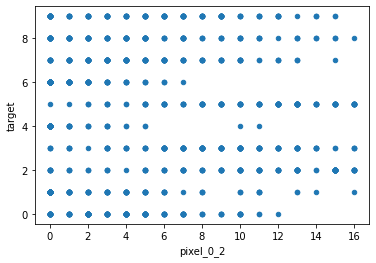

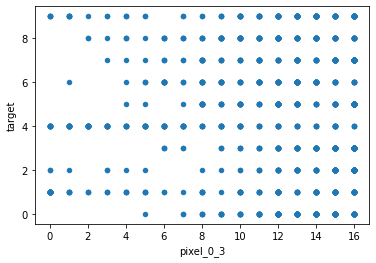

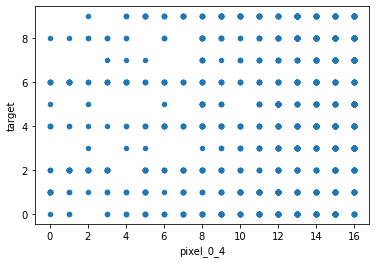

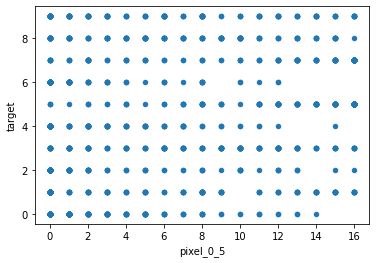

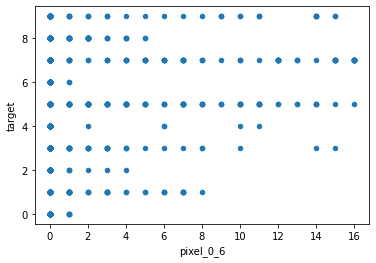

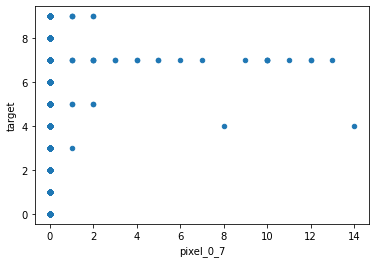

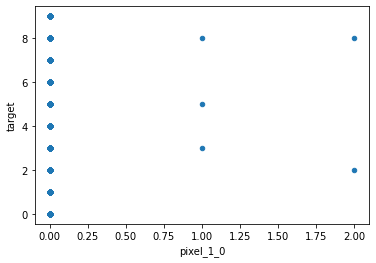

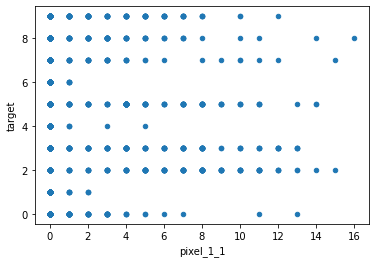

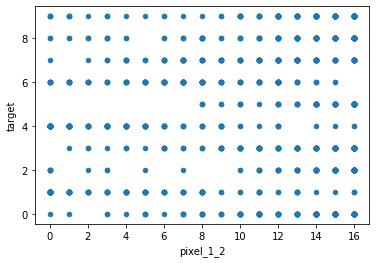

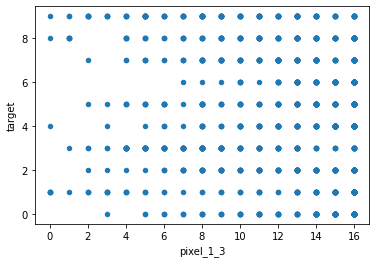

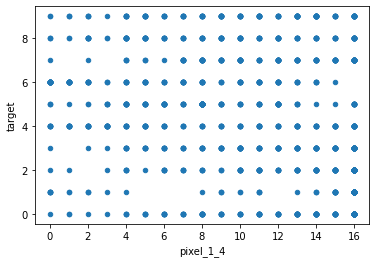

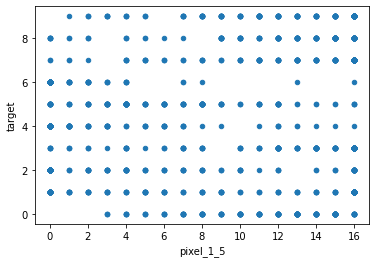

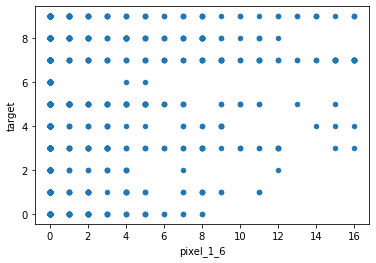

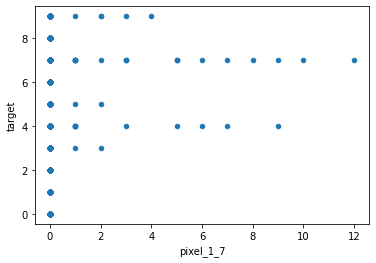

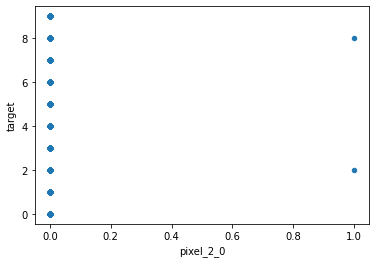

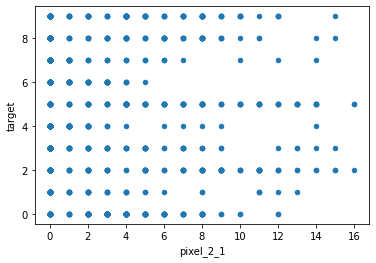

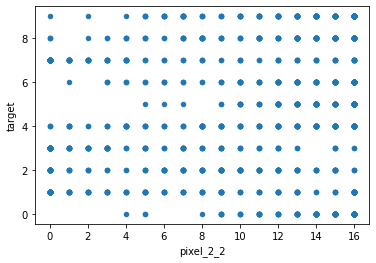

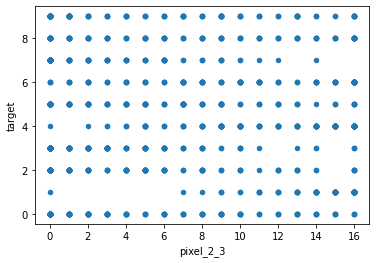

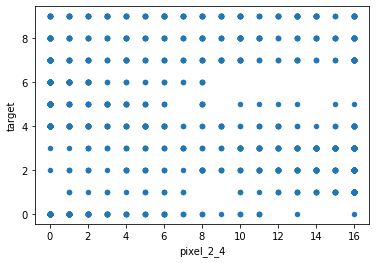

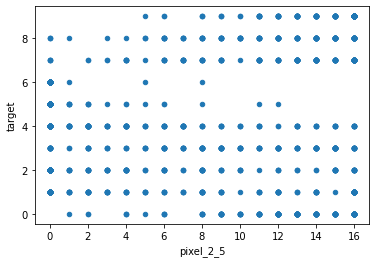

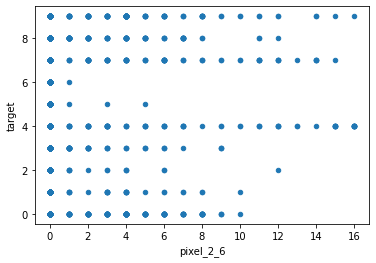

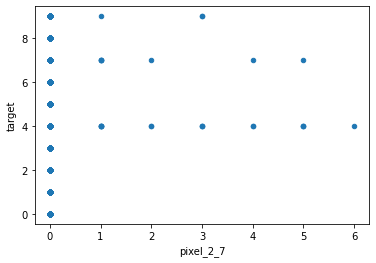

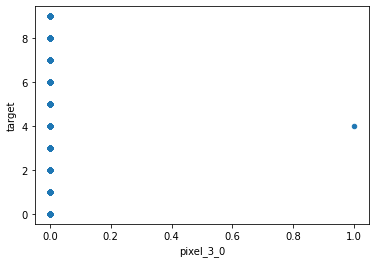

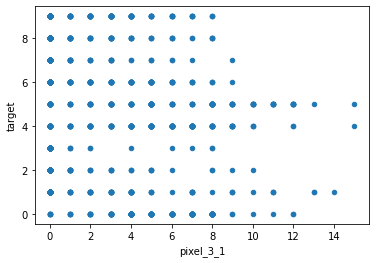

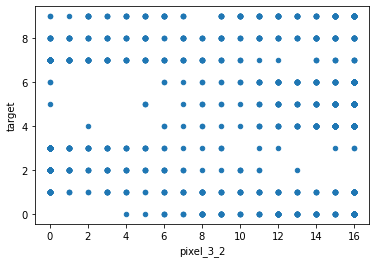

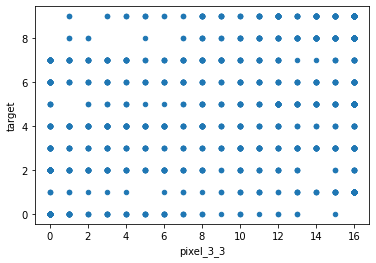

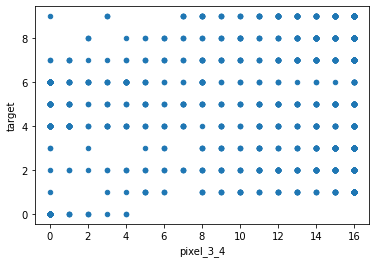

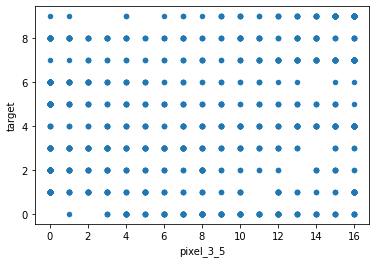

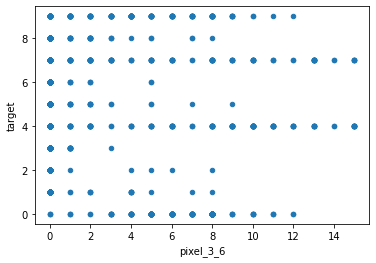

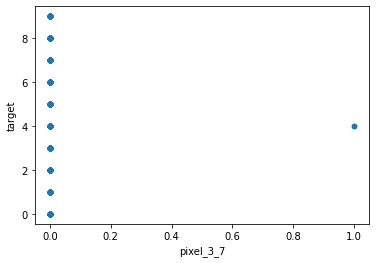

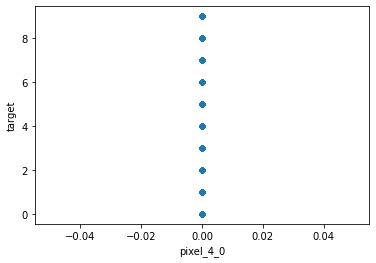

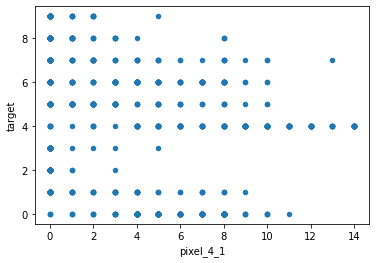

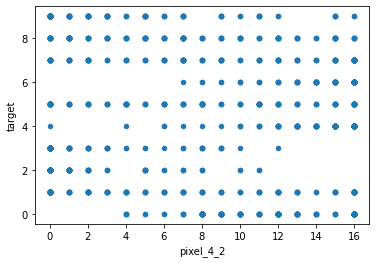

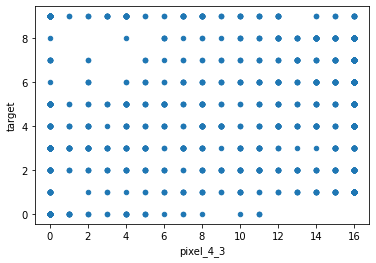

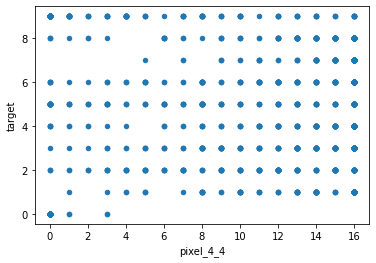

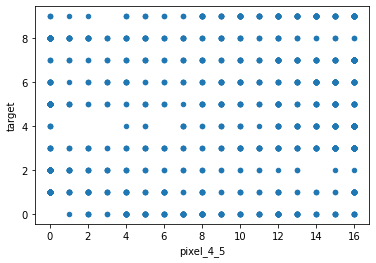

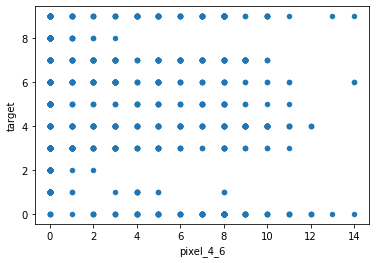

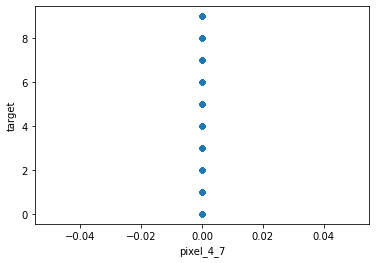

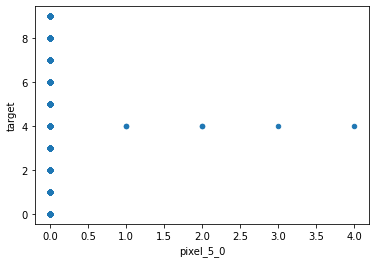

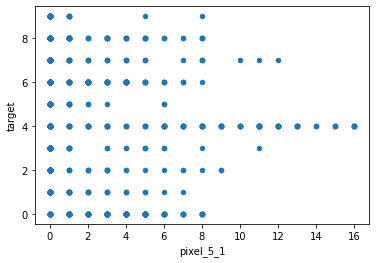

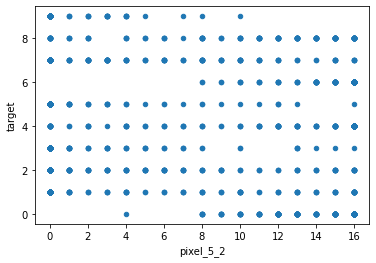

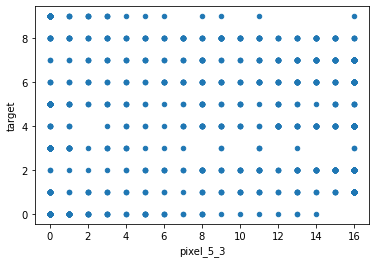

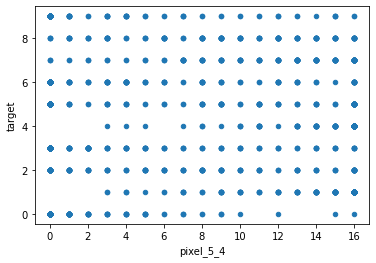

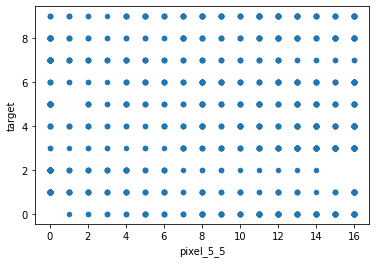

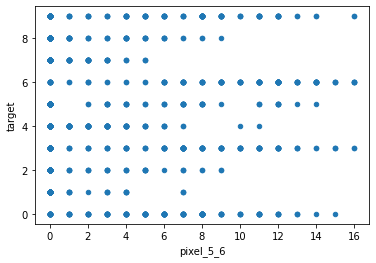

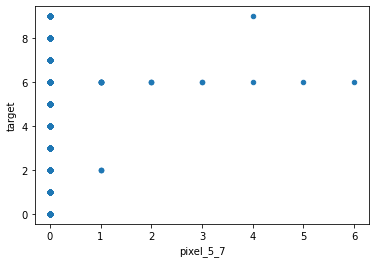

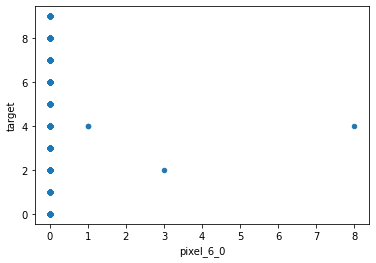

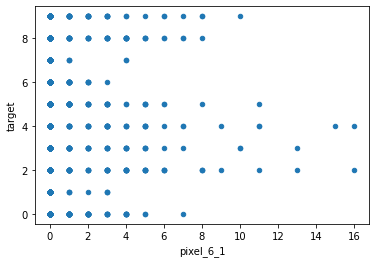

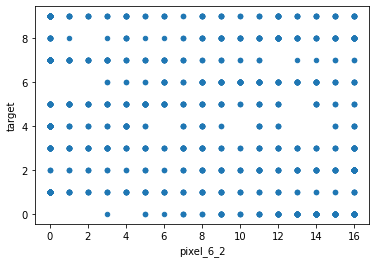

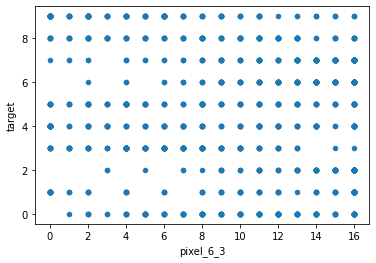

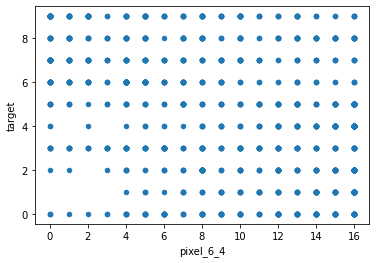

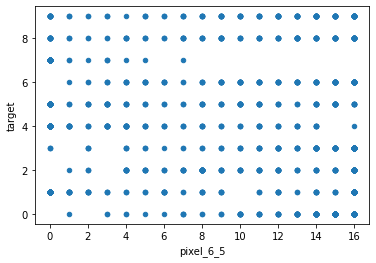

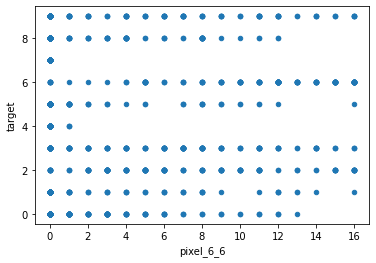

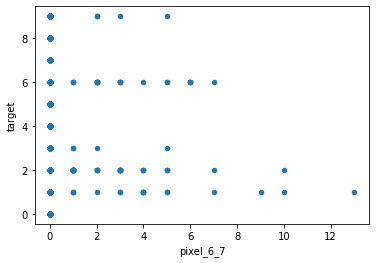

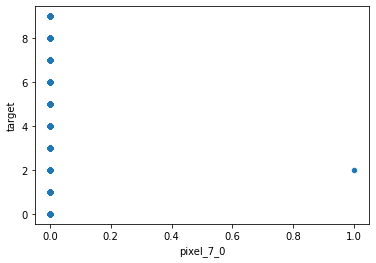

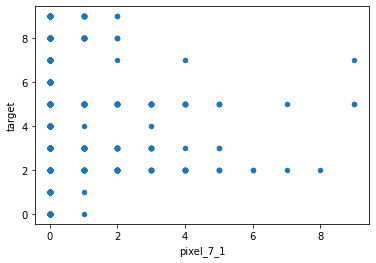

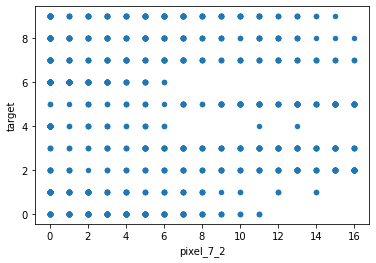

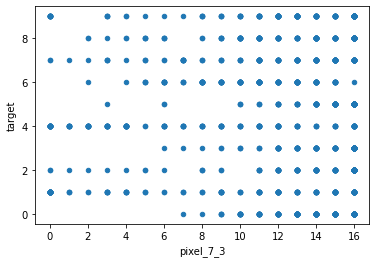

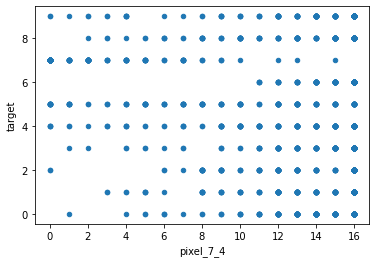

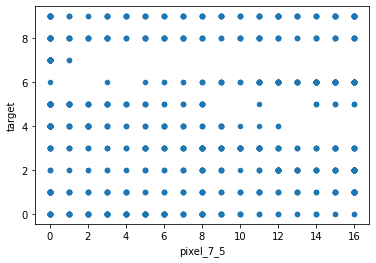

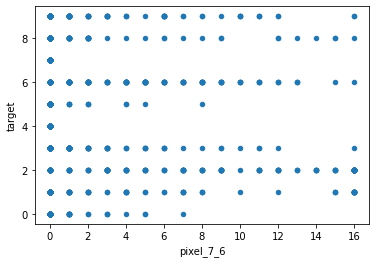

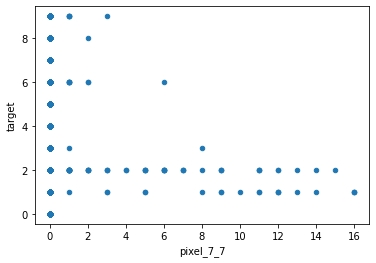

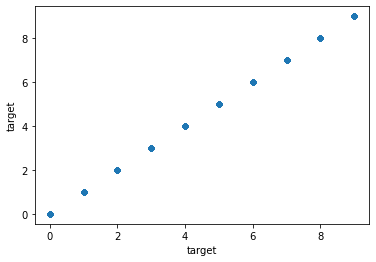

In [ ]:
colname = train_val.columns
for name in colname:
  train_val.plot(kind='scatter',x = name , y = 'target')  #一旦すべての散布図を表示

特徴量データの値はすべて０から16の間に収まっているため、
外れ値なしとして処理を続ける。
また、データのばらつきも少ないため標準化も行わない。

決定木によるモデルの準備と学習の実行

In [ ]:
x = train_val.loc[:,:'pixel_7_7'] #特徴量データの抽出
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0) #訓練データと検証データに分割

#決定木モデルを使って正解率を算出する。学習を100回実行し、正解率が最も高くなる木の深さを求める。
max = 0
n = 2
treemodel = tree.DecisionTreeClassifier(max_depth = 1,random_state=0)
treemodel.fit(x_train, y_train)
a = treemodel.score(x_train,y_train)
while n < 100:
  treemodel = tree.DecisionTreeClassifier(max_depth = n,random_state = 0)
  treemodel.fit(x_train,y_train)
  a = treemodel.score(x_val,y_val)
  n += 1
  if max < a:
    max = a
    max_n = n
print('木の深さの最適値')
print(max_n)
print('その時の正解率')
print(max)

木の深さの最適値
12
その時の正解率
0.8541666666666666


ロジスティック回帰を実装する

In [ ]:
maxScore = 0
maxIndex = 0
x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_val, y_train, y_val = train_test_split(x, t,test_size = 0.2, random_state = 0) #特徴量を訓練データと検証データに分割
# range関数により整数列を1～10生成しながら最適なCを求める
for i in range(1, 11):
    num = i/10
    lmodel = LogisticRegression(C = num,random_state=0,multi_class = 'auto', solver = 'lbfgs',max_iter=10000)#モデルの作成
    lmodel.fit(x_train, y_train)
    result = lmodel.score(x_val, y_val)
    if result > maxScore:
        maxScore = result
        maxIndex = num
print('■最適なCの値')
print(maxIndex)
print('その時の正解率')
print(maxScore)

■最適なCの値
0.1
その時の正解率
0.9756944444444444


In [ ]:
x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_val, y_train, y_val = train_test_split(x, t,test_size = 0.2, random_state = 0,) #特徴量を訓練データと検証データに分割
lmodel = LogisticRegression(C = 0.1,random_state=0,multi_class = 'auto',solver = 'lbfgs',max_iter=10000)#モデルの作成
lmodel.fit(x_train, y_train)#学習
print( lmodel.score(x_train, y_train) )
lmodel.score(x_val, y_val)#検証データで正解率確認

1.0


0.9756944444444444

ランダムフォレストを実装する

正解率が最も高くなるn_estimatorsを求める

In [ ]:
maxScore = 0
maxIndex = 0
x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_test, y_train, y_test=train_test_split(x, t,test_size = 0.2, random_state = 0)
i = 100
while i <= 1000:
    rmodel = RandomForestClassifier(n_estimators = i,random_state = 0)
    rmodel.fit(x_train, y_train)
    result = rmodel.score(x_val, y_val)
    if result > maxScore:
        maxScore = result
        maxIndex = i
    i += 100
print('■最適なn_estimatorsの値')
print(maxIndex)
print('その時の正解率')
print(maxScore)

■最適なn_estimatorsの値
100
その時の正解率
0.9895833333333334


In [ ]:
x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_test, y_train, y_test=train_test_split(x, t,test_size = 0.2, random_state = 0)
rmodel = RandomForestClassifier(n_estimators = 100,random_state = 0)
rmodel.fit(x_train, y_train)
rmodel.score(x_test,y_test)

0.9895833333333334

アダブーストを実装する（実行時間３分程度かかります）

In [ ]:
maxScore = 0
maxIndex = 0
max_estimators = 0

x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.2, random_state = 0)
i=1
while i <= 10:
  # 決定木の深さ最適値を求める
  base_model = DecisionTreeClassifier(random_state=0,max_depth=i)
  j = 100
  while j <= 500:
    # 決定木の個数最適値を求める
    amodel = AdaBoostClassifier(n_estimators = j,random_state = 0, base_estimator = base_model)
    amodel.fit(x_train,y_train) # 学習
    result = amodel.score(x_val, y_val)
    if result > maxScore:
      maxScore = result
      maxIndex = i
      max_estimators = j
    j += 100
  i += 1
print('■最適な木の深さ')
print(maxIndex)
print('■最適な決定木の個数')
print(max_estimators)
print('その時の正解率')
print(maxScore)



200
300
400
500
600
2
200
300
400
500
600
3
200
300
400
500
600
4
200
300
400
500
600
5
200
300
400
500
600
6
200
300
400
500
600
7
200
300
400
500
600
8
200
300
400
500
600
9
200
300
400
500
600
10
200
300
400
500
600
11
■最適な木の深さ
7
■最適な決定木の個数
500
その時の正解率
1.0


In [ ]:
x = train_val.loc[:,:'pixel_7_7'] #特徴量の抽出
t = train_val['target'] #正解データの抽出
x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.2, random_state = 0)
base_model = DecisionTreeClassifier(random_state=0,max_depth=7)
amodel = AdaBoostClassifier(n_estimators = 500,random_state = 0, base_estimator = base_model)
amodel.fit(x_train,y_train) # 学習
print(amodel.score(x_train,y_train))
print(amodel.score(x_val,y_val))

1.0
1.0


テストデータの決定係数算出

In [ ]:
test.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

In [ ]:
x = test.loc[:,:'pixel_7_7'] #特徴量の抽出
t = test['target'] #正解データの抽出
val1 = treemodel.score(x,t)
print('■決定木の正解率',val1)
val2 = lmodel.score(x,t)
print('■ロジスティック回帰の正解率　：',val2)
val3 = rmodel.score(x,t)
print('■ランダムフォレストの正解率：',val3)
val4 = amodel.score(x,t)
print('■アダブーストの正解率：',val4)

■決定木の正解率 0.7916666666666666
■ロジスティック回帰の正解率　： 0.9638888888888889
■ランダムフォレストの正解率： 0.975
■アダブーストの正解率： 0.9833333333333333


モデルの保存

In [ ]:
import pickle
with open('digits.pkl','wb') as f:
  pickle.dump(treemodel,f)
with open('digits.pkl','wb') as f:
  pickle.dump(lmodel,f)
with open('digits.pkl','wb') as f:
  pickle.dump(rmodel,f)
with open('digits.pkl','wb') as f:
  pickle.dump(amodel,f)